# Entanglement

When two qubits are entangled, measuring one qubit collapses its state and simultaneously determines the state of the other, regardless of distance. Before measurement, the qubits exist in a shared superposition, with their outcomes correlated. Once measured, the states of the entangled qubits are fixed, and repeated measurements yield consistent results.
In this demonstration, we will explore entanglement using IBM Quantum Composer and Qiskit.

1. [IBM Quantum Composer](#1.-IBM-Quantum-Composer)  
2. [Qiskit Implementation](#2.-Qiskit-Implementation) 
3. [Measuring Entangled States](#3.-Measuring-Entangled-States)

IBM Quantum Composer: https://quantum.ibm.com/composer/

## 1. IBM Quantum Composer

### 1.1 Start with $\ket{00}$ state

The initial state $\ket{00}$ represents two qubits both in the $\ket{0}$ state, with no entanglement.

<img src="entanglement_images/initial.png">

<img src="entanglement_images/initial_prob.png">

### 1.2 Use Hadamard Gate on the first qubit

The Hadamard gate changes the first qubit from the $\ket{0}$ state into a superposition state: 
$H\ket{0} = \frac{\ket{0} + \ket{1}}{\sqrt{2}}$.

This results in the overall quantum state of the system: $H\ket{0}\ket{0} = \frac{\ket{00} + \ket{10}}{\sqrt{2}}$.


At this stage, the qubits are not yet entangled, but the first qubit's superposition begins establishing a correlation between the two qubits.

<img src="entanglement_images/hadamard.png">

<img src="entanglement_images/hadamard_prob.png">

### 1.3 Apply CNOT gate, with first qubit as control and second qubit as target.

The CNOT gate entangles the qubits by flipping the state of the second qubit if the first qubit is in $\ket{1}$. This operation transforms the state into a well-known entangled state, the Bell state $\ket{\Phi^+}$: $\frac{\ket{00} + \ket{11}}{\sqrt{2}}$.

At this point, the qubits are fully entangled, meaning their states are interdependent.

<img src="entanglement_images/bell_state.png">

<img src="entanglement_images/bell_state_prob.png">

### 1.4 Measure both qubits.

When measured, the entangled state collapses to either $\ket{0}$ or $\ket{1}$, each with 50% probability.

The measurement of the first qubit directly determines the measurement of the second qubit due to the entanglement.

<img src="entanglement_images/measurement.png">

### 1.5 Set up and run the circuit.
<img src="entanglement_images/bell_measurement.png">

## 2. Qiskit Implementation

### Imports:

In [ ]:
%pip install qiskit
%pip install qiskit-aer

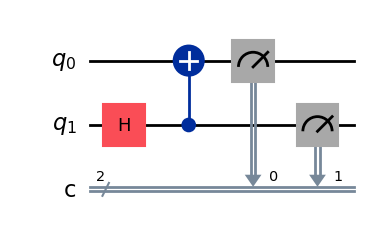

In [1]:
from qiskit import QuantumCircuit
# Initialize 2 qubit circuit
qc = QuantumCircuit(2,2)
# Apply Hadamard on first qubit
qc.h(1)

#Apply CNOT gate (control: qubit 0, target: qubit 1)
qc.cx(1, 0)

# Measure both qubits
qc.measure(0, 0)  
qc.measure(1, 1) 

qc.draw(output="mpl")

In [2]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()
job = simulator.run(qc, shots=1000) # How many copies of the circuit are executed

# Get the result and count the occurrences of each outcome
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)

Measurement results: {'00': 499, '11': 501}


## 3. Measuring Entangled States

The tensor product describes how the quantum states of two qubits combine into a joint state. The resulting state spans the combined Hilbert space of the two qubits. 

The formula for general tensor product of two qubits is:

$$
\ket{\psi_1} \ket{\psi_0} = (\alpha_1\ket{0} + \beta_1\ket{1})(\alpha_0\ket{0} + \beta_0\ket{1})
$$

If the resulting state cannot be factored into this form, it is an entangled state. 

### 3.1 Maximally Entangled States

Maximally entangled states means there are maximal amount of entanglement. Measuring one qubit will determine the measurment of the other qubit.
With two qubits, there are four maximally entangled states, called the Bell States. 

$\ket{\Phi^+} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11}),$

$\ket{\Phi^-} = \frac{1}{\sqrt{2}}(\ket{00} - \ket{11}),$

$\ket{\Psi^+} = \frac{1}{\sqrt{2}}(\ket{01} + \ket{10}),$

$\ket{\Psi^-} = \frac{1}{\sqrt{2}}(\ket{01} - \ket{10}).$


#### Step-by-Step Calculations:

$\ket{\Phi^+} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$
cannot be written as $\ket{\psi_1} \ket{\psi_0}$. 

$$
\ket{\psi_1} \ket{\psi_0} = (\alpha_1\ket{0} + \beta_1\ket{1})(\alpha_0\ket{0} + \beta_0\ket{1})
$$

$$
= \alpha_1 \alpha_0 \ket{00} + \alpha_1 \beta_0 \ket{01} + \beta_1 \alpha_0 \ket{10} + \beta_1 \beta_0 \ket{11}.
$$

Coefficients:

$(\alpha_1 + \alpha_0) = \frac{1}{\sqrt{2}}$

$(\alpha_1 + \beta_0) = 0$

$(\beta_1 + \alpha_0) = 0$

$(\beta_1 + \beta_0) = \frac{1}{\sqrt{2}}$

There are no solutions to these four equations, therefore it is an entangled state.


### 3.2 Partially Entangled States
Partially entangled states cannot be factored into a tensor product of a single qubit. 

#### Example:

$\frac{\sqrt{3}}{2\sqrt{2}}\ket{00} + \frac{\sqrt{3}}{2\sqrt{2}}\ket{01} + \frac{\sqrt{3}}{4}\ket{10} + \frac{1}{4}\ket{11}.$

If we measure only the left qubit:

The outcome is 0 with probability $3/4$, collapsing the state to $\ket{0} \left(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}\right)$.

The outcome is 1 with probability $1/4$, collapsing the state to $\ket{1} \left(\frac{\sqrt{3}}{2}\ket{0} + \frac{1}{2}\ket{1}\right)$.
